# Week 1 - Measuring Complexity

**Aims**

The aims of this workshop are to
- Ensure everyone is using a consistent OS, python environment, and IDE.
- Get comfortable with writing & running cells in Jupyter notebooks 
- Explore sorting algorithms and measure their runtime complexity. 

**Important Checklist for Today**

<input type="checkbox" checked> I can open this .ipynb file. <br>
<input type="checkbox"> I have installed WSL (if my operating system is Windows). <br>
<input type="checkbox"> I have installed VSC & added recommended extensions (optional). <br>
<input type="checkbox"> I have installed Jupyter Lab. <br>
<input type="checkbox"> I have installed python3. <br>
<input type="checkbox"> I understand how to manage python packages using venv + pip. <br>


## Introduction

**Jupyter**

We will be using <span style="color:lightseagreen">Jupyter notebooks</span> (.ipynb files) for programming tasks in workshops and assignments.<br>
We recommend [Jupyter Lab](https://jupyter.org/install) and [Visual Studio Code (VSC)](https://code.visualstudio.com/) for working with Jupyter notebooks in this subject.  <br>
These are both known as 'Integrated Development Environments (IDEs)'.

If you <u>*really*</u> can't run notebooks locally you can use [Google Colab](https://colab.research.google.com) or [Jupyter Online](https://jupyter.org/try). <br>
If using Jupyter Online, your work will not be autosaved online, so you must periodically download your updated .ipynb file.


**Jupyter Notebooks**

Jupyter notebooks provide an interactive experience. <br>
Formerly known as IPython notebooks, these have the .ipynb extension ("<u>I</u>nteractive <u>PY</u>thon <u>N</u>ote<u>B</u>ooks"). <br>
Jupyter notebooks allow you to merge code with text in the form of markdown. <br>
This means that documents don't need to be static. Users can interact with notebooks, change code, play with interactive figures, and lots more.

Many different tools provide support Jupyter notebooks. 
- Popular IDEs (VSC, JetBrains etc)
- Google Colab
- The web-based [JupyterLab](https://jupyterlab.readthedocs.io/en/latest/) and [Jupyter Notebook](https://jupyter-notebook.readthedocs.io/en/latest/) software

> 
> **Note**
> 
> 'Jupyter notebook' can refer to two different things: 
> 1. The <u>actual .ipynb files</u> like those used in this subject. 
> 2. The <u>web application</u> for creating and sharing .ipynb documents.  
> <br>

**Completing Tutorials**

During tutorials you may use any IDE which supports .ipynb files. 

In COMP90014 we recommend the following.
- [Visual Studio Code (VSC)](https://code.visualstudio.com/)
- [JupyterLab](https://jupyter.org/)

Only use an alternative if you really know what you're doing. <br>
We will only provide instructions / assistance for JupyterLab and VSC. 

**Completing Assignments**

For assignment <span style="color:lightseagreen">*submission*</span> you <u>***must use***</u> Jupyter Lab. <br>
You may use the Jupyter Notebook software as an alternative, but will have to troubleshoot problems yourself.  <br>
JupyterLab/Jupyter Notebook is required because our autograding software is built on jupyter, and other software (Colab, VSC etc) may corrupt the expected format. 


For assignment <span style="color:lightseagreen">*development*</span> you <u>***may use***</u> anything you like. <br>
In fact, an IDE such as VSC is recommended as provides useful features, such as debugging tools. 

## Operating System Setup

***Linux or Mac*** must be used as operating system in this subject. <br>If you already have either of these, <span style="color:lightseagreen">skip this section.</span> 

If you have a windows PC, fear not! <br>
Linux can be run on windows via the *Windows Subsystem for Linux (WSL)* utility.

**Installing Linux via WSL (Windows only)**

*Install WSL*
1. Open PowerShell or Windows Command Prompt in administrator mode by right-clicking and selecting "Run as administrator"
2. Enter the <small>`wsl --install`</small> command
3. Restart your machine
4. Open PowerShell or Windows Command Prompt and enter <small>`wsl -l -v`</small> to check that the Ubuntu VERSION == 2.

*Configure your Linux Distribution*
1. Open 'Ubuntu' using the start menu
    - WSL installs the Ubuntu Linux Distribution by default. 
    - On first open, Ubuntu will install & configure itself.
2. Create a username and password
    - This serves the same purpose as user/password on your windows OS. 
    - Details can be different from windows login. 
3. Update the Ubuntu package manager
    - Ubuntu uses the <small>`apt`</small> package manager. 
    - Package managers allow you to install software on your Ubuntu machine.
    - Think of <small>`apt`</small> as the Linux equivalent of the Microsoft Store.
    - The <small>`apt`</small> package manager needs to be periodically updated so it's aware of currently available software & versions. 
    - Run the <small>`sudo apt update && sudo apt upgrade`</small> command to update <small>`apt`</small>. 

*Having Issues?*
- See the guide at https://learn.microsoft.com/en-us/windows/wsl/troubleshooting
- Talk with one of the teaching team. 

<br>


## Installing Visual Studio Code (and adding extensions)

**Installing VSC**

We recommend Visual Studio Code (VSC) in this subject as it is lightweight and has rich support for extensions to add functionality. <br>
Download Visual Studio Code for your system from [here](https://code.visualstudio.com/download) and follow the instructions for:
- [macOS](https://code.visualstudio.com/docs/setup/mac)
- [Linux](https://code.visualstudio.com/docs/setup/linux)
- [Windows](https://code.visualstudio.com/docs/setup/windows)

Once installed:
1. Open VS Code
2. Open a workspace by clicking 'Open Folder' in the 'Explorer' tab (top item of left navbar).
3. Copy this .ipynb document to your workspace and open it. 

**Starting VSC on Windows PCs**

If running Linux via WSL, connect VSC to your Linux distribution each time it is opened. 
1. Click the 'Open a remote window' button (bottom left corner)
2. Select 'Connect to WSL' 

<br>

<img src="https://raw.githubusercontent.com/melbournebioinformatics/COMP90014_2024/master/tutorials/media/week1/vsc_wsl.gif" width="800">


**Adding Extensions**

Out of the box, VSC doesn't have much functionality. It's intended to be configured by the user to tailor VSC based on their needs.  

In our case, we will use VSC to:
- Develop python code
- Author and run .ipynb files 

To add this functionality to VSC we will install some *extensions.*<br>
Extensions add features & support to your VSC. 

Add the following extensions (or confirm they are already installed):
- Python
- Jupyter
- Jupyter Keymap
- Jupyter Notebook Renderers

<br>

<img src="https://raw.githubusercontent.com/melbournebioinformatics/COMP90014_2024/master/tutorials/media/week1/vsc_extensions.gif" width="200">


## Installing Python

Python v3.10 or above is required for this subject. 


**Which python are you using?**

> **Note**<br>
> Any command line code in COMP90014 assumes the Bash shell is being used on Ubuntu. <br>
> If using other shell programs and/or other operating systems your commands may be different. <br>
> For example, if using zsh on macOS, <small>`whence -p python`</small> should be used rather than <small>`which python`</small>. 

Follow the instructions below to check your python installation. 

<div style="font-size: 16px">

(Bash Shell)
> ```Bash
> # check python binary path 
> which python 
> > /usr/bin/python
>
> # check python version 
> python -V 
> > Python 3.11.5
> ```

</div>

The code above assumes that python is installed and your system knows where 'python' is. <br>
If the expected output did not appear, check whether your system knows about 'python3' instead. 

<div style="font-size: 16px">

(Bash Shell)
> ```Bash
> # check python binary path 
> which python3
> > /usr/bin/python
>
> # check python version 
> python3 -V 
> > Python 3.11.5
> ```

</div>

If this worked, feel free to use <small>`python3`</small> instead of <small>`python`</small> going forward, or create an alias for python->python3. <br>
In the example above, the same output is printed because <small>`python3`</small> is aliased to <small>`python`</small> on my system. 

> **Note**<br>
> Make sure you're using your system python, not a version of python managed by tools like conda. <br>
> The <small>`which python`</small> command should returns a path similar to <small>`/usr/bin/python`</small>. <br>
> If instead the path contains 'miniconda' or 'conda' in it, disable conda profile autoactivation. <br>
> Using a shell (Bash for ubuntu, zsh/terminal for mac), enter the following command: <small>`conda config --set auto_activate_base false`</small>.<br>
> Restart VSC then check python version again to confirm the change. <br><br>



**Installing latest Python**

If you do not have python v3.10+ installed, you will need to do so. 
If running MacOS / Linux, the latest python version can be installed [here.](https://www.python.org/downloads/)<br>
If running Ubuntu Linux via WSL, open Ubuntu, then follow these command line instructions:

<div style="font-size: 16px">

(Bash Shell)
> ```Bash
> # update package manager 
> sudo apt update
> 
> # install python 
> sudo apt install python3
>
> # verify installation
> python3 -V
> ```

</div>




## Managing python environments with pip + venv

Proper management of your python environment is pivotal as a software engineer. <br>
We will put this into practise in COMP90014. 

> **Note**<br>
> Use of Conda (anaconda/miniconda/mamba etc) is strongly discouraged in this subject. <br> 
> If you have Conda installed, we advise you turn off auto-activation of the base environment. <br>
> Using a shell (Bash for ubuntu, zsh/terminal for mac), enter the following command: <small>`conda config --set auto_activate_base false`</small>. <br>
> <br>



**What are environments and why do we care?**

When a python programmer has multiple ongoing projects, package conflicts will eventually emerge. <br>
This is because different python projects require different python libraries & versions. <br>
In other words, each project has a unique python ***environment*** it needs to function. <br>

If our COMP90014 programmer has a single python environment (the system python environment), conflicts will quickly emerge. <br>

Take the following example:
- Week 1 tutorial requires <small>`numpy v1.26.1`</small>
- Week 2 tutorial requires <small>`numpy v2.0.0+`</small>

The python package manager, [Pip](https://pip.pypa.io/en/stable/getting-started/), can't install two versions of the same package in a single environment at the same time. <br>
Pip will have to uninstall one version to install the other. <br>
The result is that your system python environment can ***run either*** the week 1 tutorial code, **or** the week 2 tutorial code, but never both.  
 
This is a straightforward example. Environment conflicts can be truly harrowing in extreme cases. 




**Proper python environment management**

In practise, the system python environment should never be used to actually run any python code (except for quick commands etc). 

Instead, each python project you're working on should have it's own environment. <br>
This prevents odd bugs and helps minimise package conflicts. 

Each time you start working on a tutorial or assignment in COMP90014, do the following:
1. Create a directory to work in. 
2. Change to that directory.
3. Create a python environment. 

Using a shell (Bash for ubuntu, zsh/terminal for mac), follow the instructions below. 

<div style="font-size: 16px">

(Bash Shell)
> ```Bash
> 
> # navigate to the folder you will work in (example below, this can be wherever you like)
> cd COMP90014/tutorials/week1
> 
> # check your python is correct
> which python 
> > /usr/bin/python
> python -V 
> > Python 3.11.5
>
> # use the venv module to create a virtualenv. 
> # calling `python -m venv` runs the venv module, and the final 'venv' specifies the name of the environment
> python -m venv venv
> 
> # activate the environment to begin working 
> # note: only activates in your current shell. if using VSC / Jupyter Lab, ensure you select it as the 'kernel'.
> source venv/bin/activate 
> 
> # check the environment is clean (should only list pip and setuptools)
> pip list 
> 
> # Install the 'jupyter' package using pip. This is needed to run code in .ipynb files. 
> pip install jupyter
>
> # Install the 'matplotlib' package using pip. 
> pip install matplotlib
> 
> # check the environment now has the required packages (should list a bunch of packages)
> pip list 
> 
> ```

</div>



See the .gif below for an example using VSC. 

> **Note** <br>
> Calling each environment 'venv' rather than a unique name is a common custom. <br>
> The python environment should be stored in the main working directory of your project. <br>
> For this reason, it's very location tells you "I am the environment for python code in this directory". 

Notice that the Bash shell displays loaded environments by prepending the environment name to your prompt. <br>
In the example below, <small>`grace@DESKTOP-JI959V6:`</small> becomes <small>`(venv) grace@DESKTOP-JI959V6:`</small>.

<img src="https://raw.githubusercontent.com/melbournebioinformatics/COMP90014_2024/master/tutorials/media/week1/vsc_python_venv.gif" width="800">


The python venv environment is now loaded in your shell. 

**Working on notebooks**

<u>*Visual Studio Code*</u>

You will need to tell VSC to use this new venv environment. 
1. Open the .ipynb file
2. Click 'Select Kernel' (top right), then select the python environment (venv) you just created. 

<u>*Jupyter Lab*</u>

The correct environment should be already be loaded as it used to launch jupyter. 
1. Run jupyter by using the <small>`jupyter lab`</small> command in a shell.
2. Copy the link it provides and open in your web browser to begin work.


<br>

------------

# Features of Jupyter notebooks

Jupyter notebooks (like this one) are organised into cells. If you double click this text, you can see (and edit) the content in the cell. Use Shift-Enter (or Shift-Return) to execute the cell.

**Markdown cells**

This cell is a markdown cell. It appears as text. 
In markdown cells, you can format headings with "#" or subheadings with "##". 

You can also use **bold** or _italic_ type...
* or bullet points
1. or even numbered lists.

Double click this cell to see how these elements are encoded.

**Code cells**

The cell below is a code cell. Underneath is the output of that code.<br>
The Jupyter notebooks we use for this subject will always use Python 3.

In [ ]:
print("Hello world!")

Execute the two code cells below. Note that variables defined in the first code cell can be used in the second cell without being redefined.

In [ ]:
str_1 = 'foo'
str_2 = 'bar'

In [ ]:
str_1 + str_2

Use Python code to complete the function in the cell below. Similar to the example above, a function defined in one cell can be called in another cell.

The function should take two integers *a* and *b* as inputs and return the sum of *a* and *b* as an integer.

In [ ]:
def add_ints(a, b):
    # Your code here

In [ ]:
add_ints(1, 3) # Should output 4.

You can also use the command ? or help() to get help on any built-in functions. For instance, sorted? or help(sorted).

In [ ]:
sorted?

You can run shell commands from the notebook by prefixing them with an `!`

In [ ]:
!ls -lah

**Keyboard shortcuts**

Below is a list of useful shortcuts. Try opening a new cell (a code cell by default) and converting it to a markdown cell. Try copying and pasting that cell. Play around with these shortcuts until you feel confident.
* Shift-Enter : execute the code in the current cell
* Enter : edit the current cell
* ESC : stop editing a cell and return to "command mode" to use other hotkeys
* m : turn the current cell into a Markdown cell
* y : turn the current cell into a code cell
* a : add a new cell above
* b : add a new cell below
* dd : delete the current cell
* c : copy the current cell
* v : paste the copied cell
* z : undo


For more information about using Jupyter notebooks, try this tutorial from AARNet:
<https://aarnet.github.io/Introduction_to_Jupyter_notebooks/>

<br>

------------

# Sorting Algorithms & Runtime Complexity

In this final section we will:
    
1. Implement Selection Sort
2. Implement Merge Sort
3. Empirically determine complexity for Insertion, Merge, and Selection Sort

In [44]:
# Get matplotlib plots to appear inline in the notebook
%matplotlib inline

# Import packages
import matplotlib.pyplot as plt
import numpy as np

## Insertion sort 

Here is a visual reminder of how insertion sort works.

<img src="https://raw.githubusercontent.com/melbournebioinformatics/COMP90014_2024/master/tutorials/media/week1/Insertion-sort-example.gif" width="400">


<div style="font-size: 16px">

> ```python
> # Source: A. Levitin, Introduction to the Design and Analysis of Algorithms, Pearson, 3rd edition, 2012
> 
> ALGORITHM InsertionSort(A[0..n − 1])  
> 
>     # Sorts a given array by insertion sort  
>     # Input: An array A[0..n − 1] of n orderable elements  
>     # Output: Array A[0..n − 1] sorted in nondecreasing order   
>     
>     for i ← 1 to n − 1 do  
>         v ← A[i]  
>         j←i−1  
>         while j ≥ 0 and A[j ] > v do  
>             A[j + 1] ← A[j ]  
>             j←j−1   
>         A[j + 1] ← v
> 
> ```

</div>

Below is a python implementation. <br>
This implementation sorts the list in-place, so the original list will also be modified.

In [ ]:
def isort(items):
    """
    Sort a list in-place using insertion sort
    """
    # For each item in list from 2nd to final position
    for index in range(1, len(items)):
        # Store value of current index position
        current_item = items[index]
        # Check if current item value is smaller than the value to the left
        # AND that there is an item to the left
        while index >= 1 and (current_item < items[index - 1]):
            # If item to the left is larger than current item move it up one position
            items[index] = items[index - 1]
            # Compare current item to item one MORE to the left on next loop
            index -= 1
        # Exit loop when current item is > than item to the left
        # Overwrite index position with current item value
        items[index] = current_item
    return items

<div class="info">
<b>Challenge:</b> Modify the isort() function above to print the partially sorted list on each pass and sort a reversed list.
</div>

In [42]:
def isort_mod(items):
    """
    Sorts a list in-place using insertion sort.
    """
    raise NotImplementedError

In [ ]:
# Now use your modified function to sort a reversed list and observe the changes with each iteration of the main loop
revlist = [10,9,8,7,6,5,4,3,2,1]
isort_mod(revlist)

# Testing time complexity

We've written some functions below that create lists with different properties. <br>
Execute the following cell so that your python kernel knows about them. 

In [43]:
def sorted_list(N):
    """Creates a list of N integers that is already sorted."""
    return list(range(N))

def reversed_list(N):
    """Creates a list of N integers, sorted in reversed order."""
    return sorted_list(N)[::-1]

def random_list(N):
    """Creates a list of N integers, shuffled randomly."""
    items = sorted_list(N)
    np.random.shuffle(items)
    return items

In [24]:
sorted_list(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [28]:
reversed_list(10)

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [29]:
random_list(10)

[2, 8, 4, 7, 0, 5, 6, 3, 9, 1]

Let's test the performance of insertion sort using Jupyter's `%timeit` magic. We'll make the list outside the timed cell, as we don't want to time the creation.

In [30]:
items = random_list(10)
%timeit isort(items)

465 ns ± 2.86 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


On a bigger list:

In [31]:
items = random_list(1000)
%timeit isort(items)

42.8 μs ± 1.64 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Here's a helper function called `time_sort()` that you can use to time a sort function once you've written it, and plot the results. <br>
We'll use this to assess the performance of our python `isort()` insertion sort implementation on different inputs. 

In [45]:
import builtins
from timeit import timeit
from IPython.core.getipython import get_ipython

def time_sort(sort_function, input_list):
    """
    Times a sort function on a given input list using timeit.
    Makes use of a global variable unsorted_list, which will be overwritten.
    Assumes we are being called from an IPython/Jupyter context and adds the
    IPython namespace to the local namespace.
    """
    builtins.__dict__.update(get_ipython().__dict__['user_ns'])
    global unsorted_list
    unsorted_list = input_list
    num_runs = 1000
    command = "{}(unsorted_list)".format(sort_function.__name__)
    return timeit(command, globals=globals(), number=num_runs)/num_runs

Run the cell below to visualise our `isort()` function's runtime performance with different inputs.

Here we're looking at performance when...
- The input list is already sorted
- The input list is random
- The input list is reverse sorted

For each of these situations, we will run the `isort()` function many times, each time increasing the number of items in the list. 


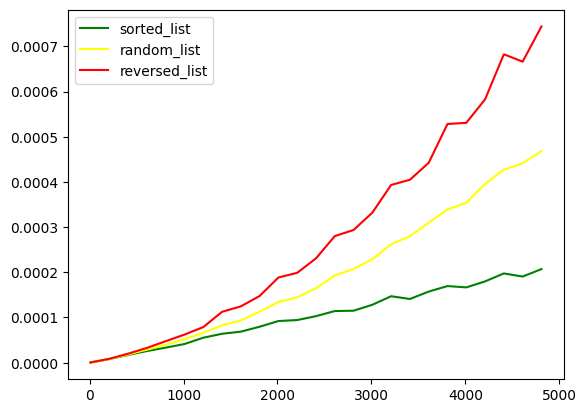

In [46]:
n_items = list(range(10,5000,200))
funcs = [sorted_list, random_list, reversed_list]
colors = ['green', 'yellow', 'red']

for func, color in zip(funcs, colors):
    data = []
    for n in n_items:
        the_input = func(n)
        time_taken = time_sort(isort, the_input)
        data.append(time_taken)
    plt.plot(n_items, data, c=color, label=func.__name__)

plt.legend()
plt.show()

## Selection sort 

The selection sort algorithm similar to the insertion sort algorithm discussed in lectures, but even simpler to implement. 

<img src="https://raw.githubusercontent.com/melbournebioinformatics/COMP90014_2024/master/tutorials/media/week1/selection_sort.gif" width="400">

Here is a version of the algorithm in words:

1. Initialise the sorted list as an empty list
2. Search the original list for the smallest element
3. Remove this element from the original list and insert it at the end of the sorted list 
4. Repeat from step 2 until the unsorted list is empty

Since we built the sorted list from the smallest to the largest element, we can just add each new element on to the end.

<div class="info">

<b>Challenge:</b> Implement selection sort below. 

</div>

In [ ]:
def selection_sort(items):
    """
    Sorts a list of items using selection sort.
    """
    raise NotImplementedError

In [ ]:
x = [5,3,7,22,4,3]
print(selection_sort(x))
assert selection_sort(x) == sorted(x)


<br>

-----------------

# Extension Activity: Merge Sort

This section is optional. 

In this section we will complete a partially-coded implementation of merge sort. 

Here is a reminder for the merge sort algorithm

<img src="https://raw.githubusercontent.com/melbournebioinformatics/COMP90014_2024/master/tutorials/media/week1/merge_sort_2.gif" width="400">

Here is the merge sort code given in lectures:

In [ ]:
def msort(items):
    len_list = len(items)
    if len_list <= 1:
        return items
    else:
        mid_point = len_list//2
        top = items[:mid_point]
        bottom = items[mid_point:]
        return merge(msort(top), msort(bottom))

This function won't work yet because it depends on a `merge()` function, which we haven't defined.

<div class="info">
    <b>Challenge:</b> Write a merge function to merge two lists. Assume both lists are already sorted, and ensure that the resulting list is sorted.
</div>

In [ ]:
def merge(list1, list2):
    """
    merges two sorted lists into a single sorted list. 
    """
    raise NotImplementedError

In [ ]:
# Test your merge function
x1 = [4,6,9]
x2 = [2,6,20,21]
print(merge(x1,x2))
assert merge(x1,x2) == [2,4,6,6,9,20,21]

Once you have `merge()` working, `msort()` should work correctly:

In [ ]:
x = [5,3,7,22,4,3]
print(msort(x))
assert msort(x) == sorted(x)